In [ ]:
#Website Traffic Forecasting using Python
# https://thecleverprogrammer.com/2022/06/28/website-traffic-forecasting-using-python/
#Web Sitesi Trafik Tahmini, belirli bir dönemde bir web sitesindeki trafiği tahmin etmektir.

In [13]:
#Gerekli kütüphaneleri import edelim.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [14]:
#veri setini okuyalım.
data=pd.read_csv("C:/Users/Asus/Thecleverprogrammer.csv/Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [15]:
#Veri kümesi iki sütundan oluşuyor:tarih ve trafik.Tarih sütununu Datetime veri türüne dönüştürelim:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


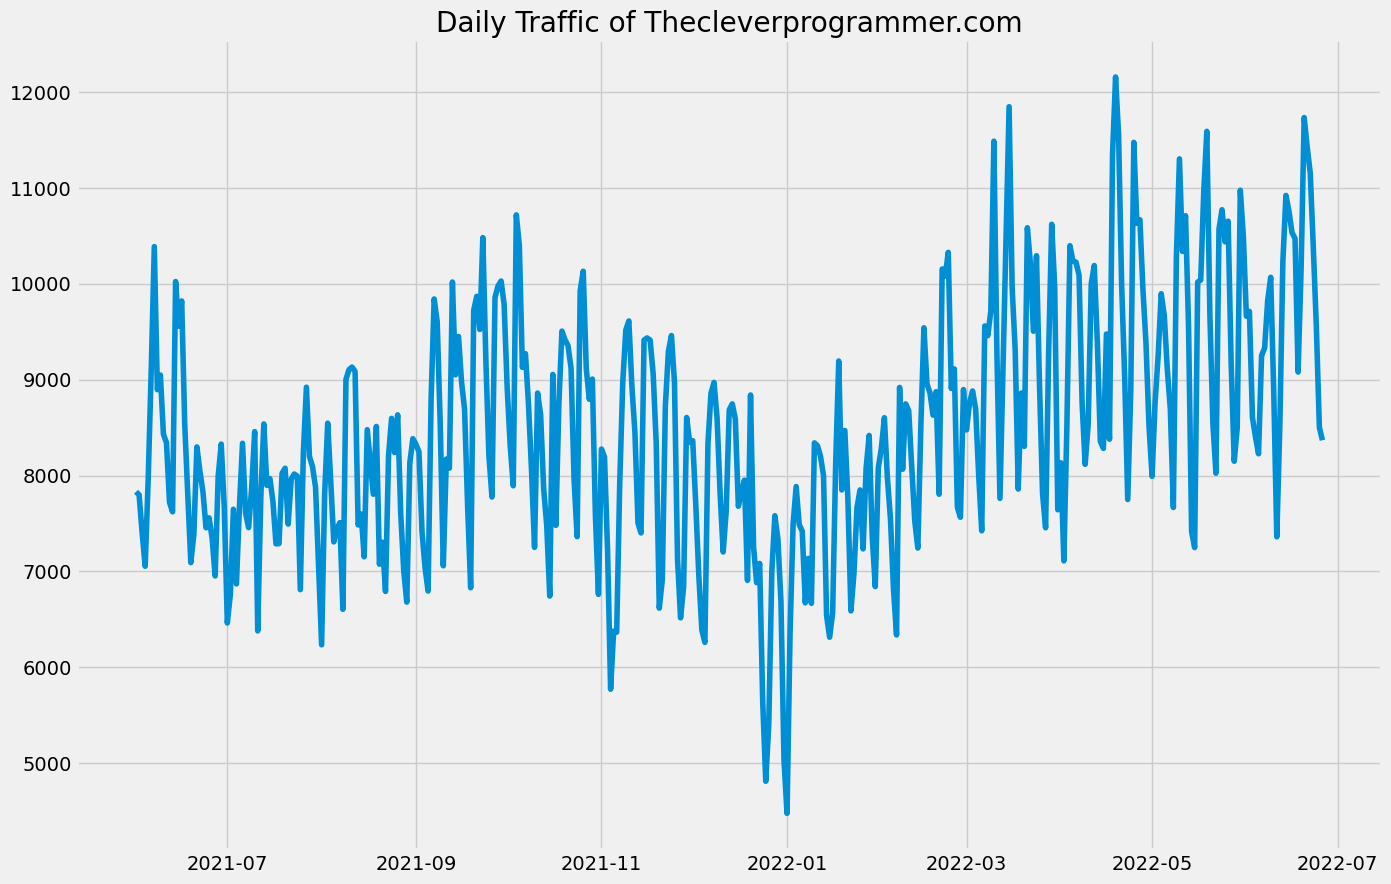

In [16]:
plt.style.use('fivethirtyeight')
#Grafik boyutu ayarlanıyor.
plt.figure(figsize=(15, 10))
#data["Date"] tarih sütununu x ekseni, data["Views"] görüntüleme sütununu y ekseni olacak şekilde çizgi grafiği çiziliyor.
plt.plot(data["Date"], data["Views"])
#Grafiğe başlık ekleniyor.
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

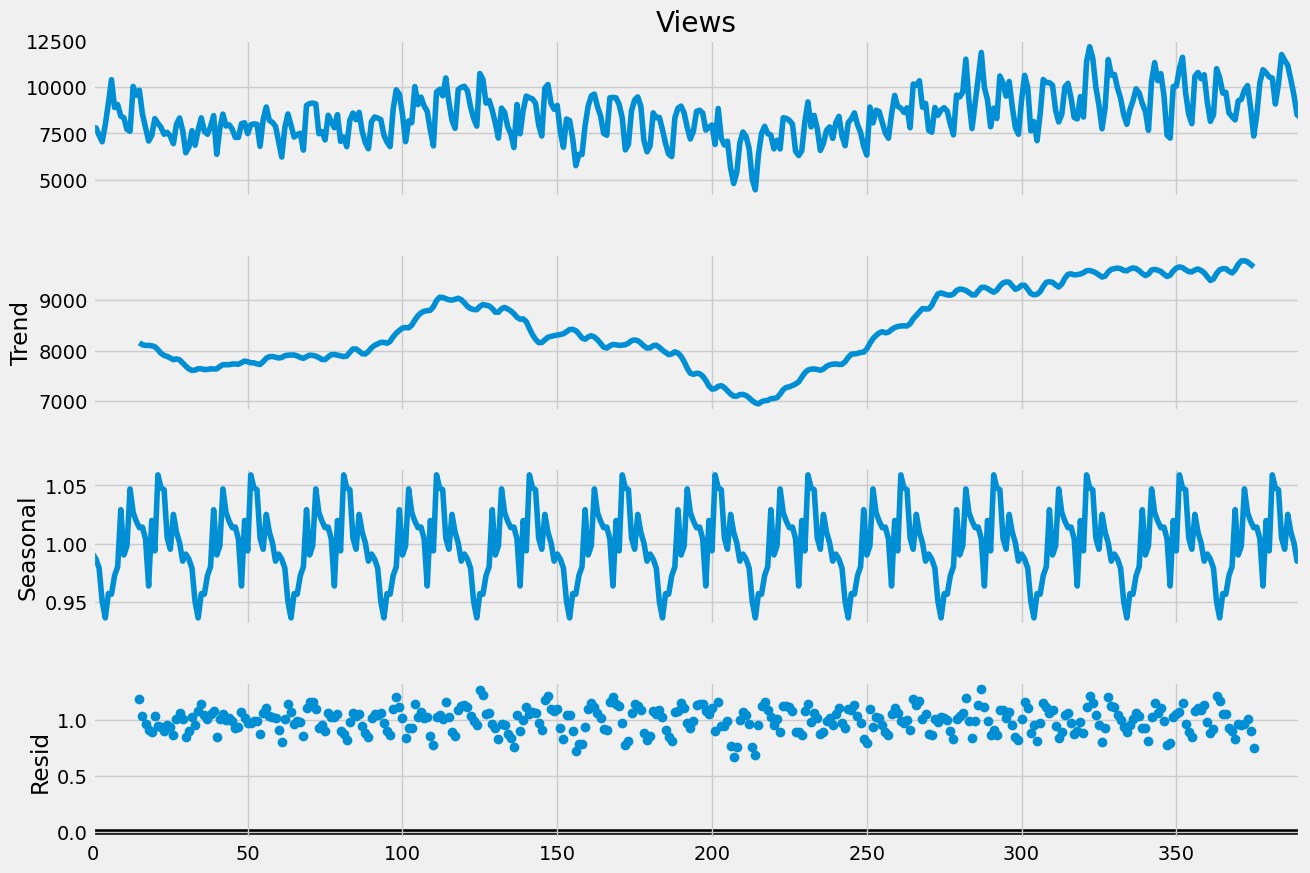

In [17]:
# Veri setimizin durağan mı yoksa mevsimsel mi olduğuna nasıl bakabiliriz?
#seasonal_decompose fonksiyonu, "Views" sütununu kullanarak veriyi mevsimsel bileşenlere ayırmak için çağrılıyor.
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)        #periyot 30 olarak ayarlanıyor.
fig = plt.figure()  
fig = result.plot() 
# Grafik boyutu 15x10 olarak ayarlanıyor ve gösteriliyor. 
fig.set_size_inches(15, 10)

Web sitesindeki trafiği tahmin etmek için Mevsimsel ARIMA (SARIMA) modelini kullanacağım. SARIMA modelini kullanmadan önce p, d ve q değerlerini bulmak gerekir.

Veriler durağan olmadığından, d değeri 1'dir. p ve q değerlerini bulmak için otokorelasyon ve kısmi otokorelasyon grafiklerini kullanabiliriz.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

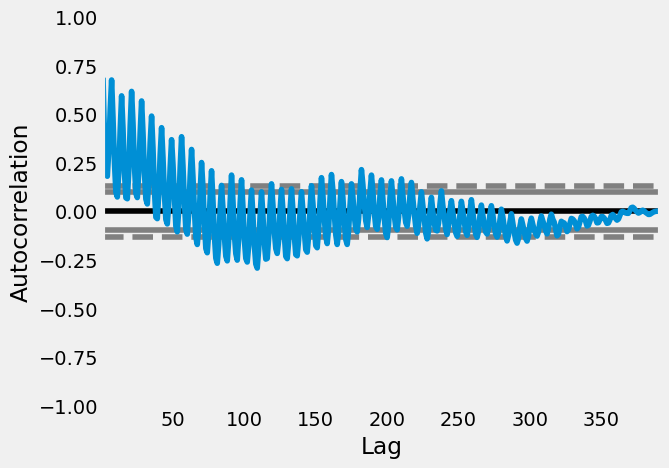

In [18]:
#data["Views"] verisinin otokorelasyonunu görselleştiren bir çizgi grafik oluşturur.
pd.plotting.autocorrelation_plot(data["Views"])

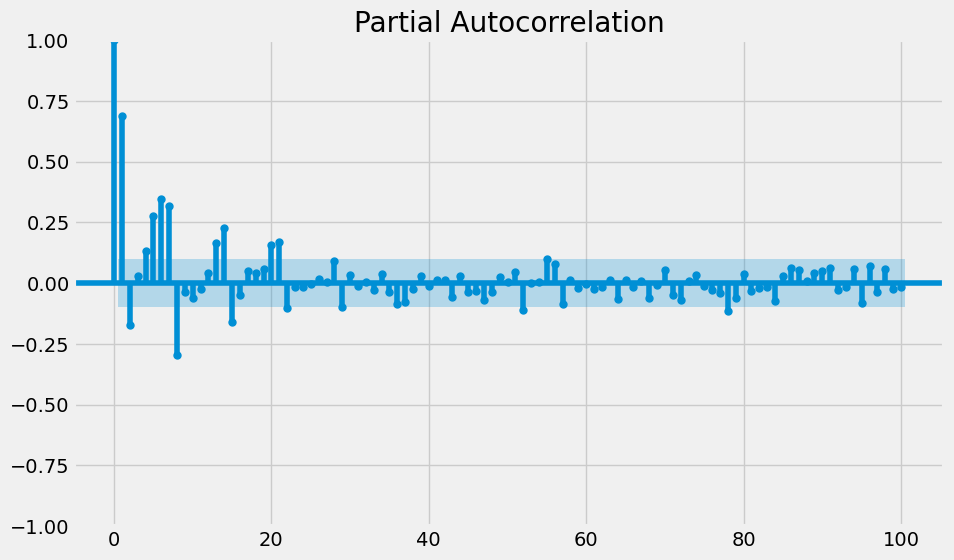

In [21]:
#data["Views"] verisi için 100 gecikmeli parcelleme otokorelasyon fonksiyonu (PACF) grafiğini oluşturur.
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# PACF grafiğini çizmek ve tek bir grafikle göstermek
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(data["Views"], lags=100, ax=ax)
plt.show()

In [ ]:
#Şimdi bir SARIMA modelini web sitesi trafiğini tahmin etme görevi için nasıl eğitebileceğimizi görelim:
#Model için p, d, q parametreleri sırasıyla 5, 1 ve 2 olarak belirleniyor.
p, d, q = 5, 1, 2
#SARIMAX fonksiyonu, data['Views'] verisi ile modelin oluşturulmasını başlatıyor ve modelin genel düzeni belirleniyor.
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))

#Modelin parametreleri fit edilerek eğitilmesi sağlanıyor.
model=model.fit()
print(model.summary())


c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.018
Date:                            Tue, 03 Dec 2024   AIC                           6228.036
Time:                                    16:44:30   BIC                           6287.060
Sample:                                         0   HQIC                          6251.462
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7774      0.132      5.883      0.000       0.518       1.036
ar.L2         -0.8046      0.135   

In [23]:
#Şimdi web sitemizin önümüzdeki 50 güne ait trafiğini tahmin edelim:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9898.185947
392    10810.519781
393    10717.880037
394     9816.329986
395     8757.821755
396     8232.763780
397     8953.806880
398     9733.033307
399    10324.117490
400    10584.125907
401     9845.242562
402     9306.424686
403     8998.024586
404     9093.812820
405    10515.094098
406    11005.055868
407    10888.639407
408    10024.709753
409     9374.277331
410     8605.564783
411     9210.545245
412    10380.282204
413    10655.131310
414    10800.064182
415    10214.641555
416     9371.308252
417     8961.782481
418     9179.650849
419     9960.621822
420    10287.550052
421    10724.627253
422     9858.903692
423     9467.280689
424     8978.455564
425     8892.565794
426    10226.656438
427    10908.063945
428    10901.538040
429    10317.721969
430     9367.246592
431     8681.482497
432     8769.974591
433    10145.007602
434    10586.896221
435    10859.390570
436    10379.512468
437     9272.361756
438     9158.212991
439     9413.326735
440    10376.910259


<Axes: >

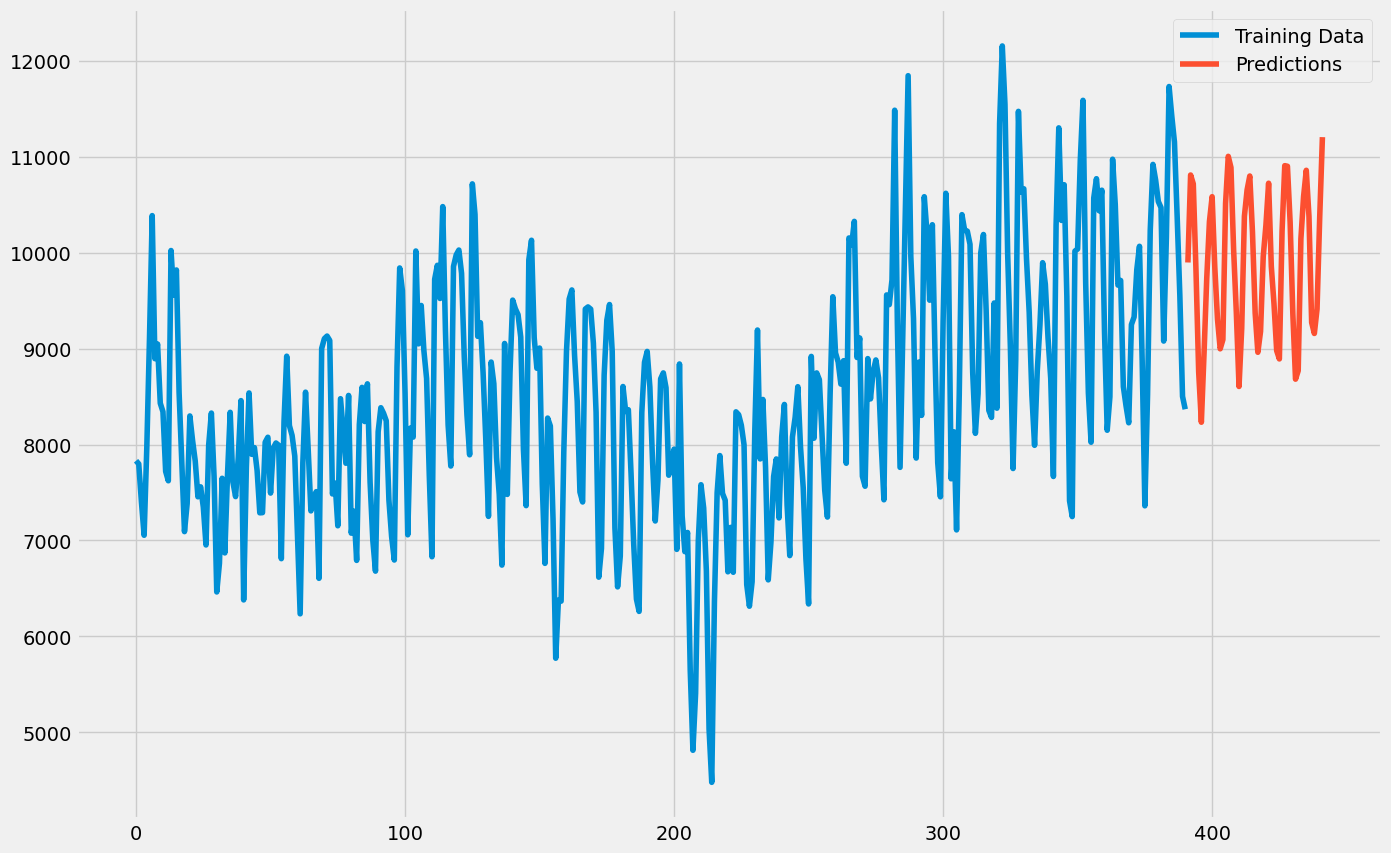

In [ ]:
#Tahminleri görselleştirelim.

data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")